In [22]:
import geopandas as gp
import numpy as np
import os
from sklearn import preprocessing
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
working_dir = '/home/jovyan/development/training_data/'
filename = os.path.join(working_dir, '2015_merged.shp')

In [64]:
data = gp.read_file(filename)

```+----------------------------------+------+--------------+
| Class name                       | Code | Numeric code |
+==================================+======+==============+
| Cultivated Terrestrial Vegetated | A11  | 111          |
+----------------------------------+------+--------------+
| Natural Terrestrial Vegetated    | A12  | 112          |
+----------------------------------+------+--------------+
| Cultivated Aquatic Vegetated     | A23  | 123          |
+----------------------------------+------+--------------+
| Natural Aquatic Vegetated        | A24  | 124          |
+----------------------------------+------+--------------+
| Artificial Surface               | B15  | 215          |
+----------------------------------+------+--------------+
| Natural Surface                  | B16  | 216          |
+----------------------------------+------+--------------+
| Artificial Water                 | B27  | 227          |
+----------------------------------+------+--------------+
| Natural Water                    | B28  | 228          |
+----------------------------------+------+--------------+```

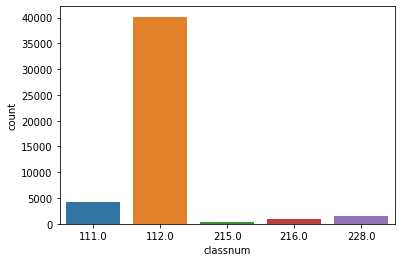

In [65]:
sns.countplot(data['classnum'])

In [114]:
data['weight'] = np.where(data['classnum'] == 112, 0.01, 0)
data['weight'] = np.where(data['classnum'] == 111, 0.15, data['weight'])
data['weight'] = np.where(data['classnum'] == 216, 0.9, data['weight'])
data['weight'] = np.where(data['classnum'] == 228, 0.9, data['weight'])
data['weight'] = np.where(data['classnum'] == 215, 0.9, data['weight'])

In [115]:
sample = data.sample(n=8000, weights = 'weight', random_state = 1234)

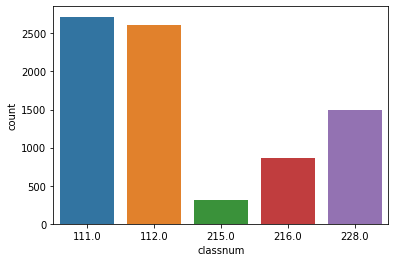

In [116]:
sns.countplot(sample['classnum'])

In [117]:
sample['class'] = sample['classnum']

In [69]:
data['class'] = np.where(data['classnum'] == 111, 111, 0)

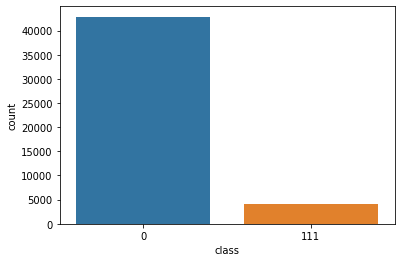

In [70]:
sns.countplot(data['class'])

In [94]:
data['classweight'] = np.where(data['class'] == 111, 0.9, 0.025)

In [95]:
sample = data.sample(n=8000, weights = 'classweight', random_state = 1234)

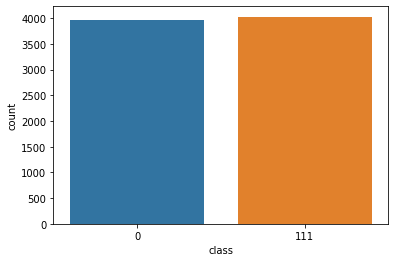

In [96]:
sns.countplot(sample['class'])

In [119]:
out = sample[['geometry', 'class']]
print(out.shape)
print(out.head())

out.to_file(os.path.join(working_dir, '2015_merged_sample.shp'))

(8000, 2)
                                                geometry  class
2954   POLYGON ((1636700.000 -3251325.000, 1636650.00...  228.0
23381  POLYGON ((-20905.559 -2395718.772, -20812.069 ...  215.0
14733  POLYGON ((1577800.000 -2193475.000, 1577750.00...  111.0
33320  POLYGON ((845125.000 -2757325.000, 845125.000 ...  216.0
32985  POLYGON ((843300.000 -2759800.000, 843250.000 ...  216.0
